Task 2: Clustering

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("datamining/iris_cleaned.csv")


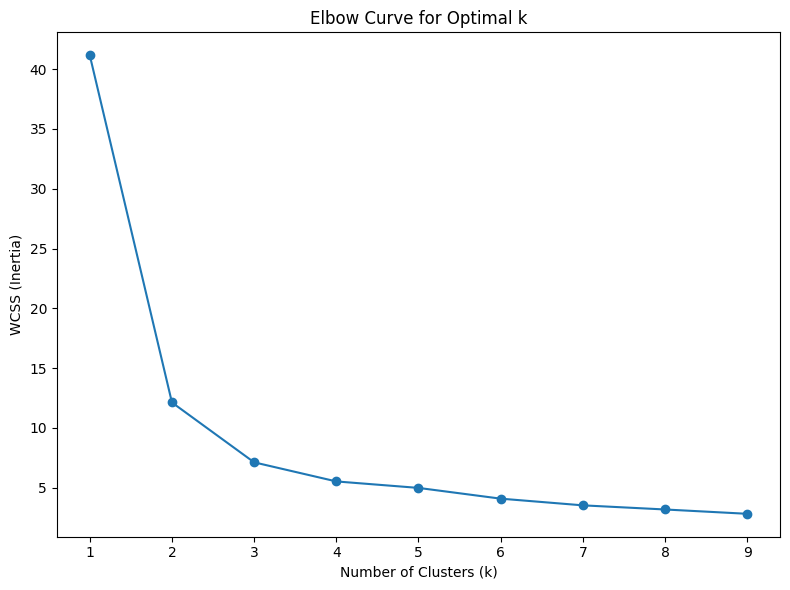

In [24]:
# Generate elbow curve
wcss = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Curve for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.xticks(k_values)
plt.tight_layout()
plt.savefig("datamining/visualizations/elbow_curve.png")

In [ ]:
# Apply k-means with 2,4 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42).fit(X)
kmeans_4 = KMeans(n_clusters=4, random_state=42).fit(X)

kmeans_2



KMeans(n_clusters=2, random_state=42)

Clustering complete. Results saved to iris_clustered.csv and iris_clusters.png


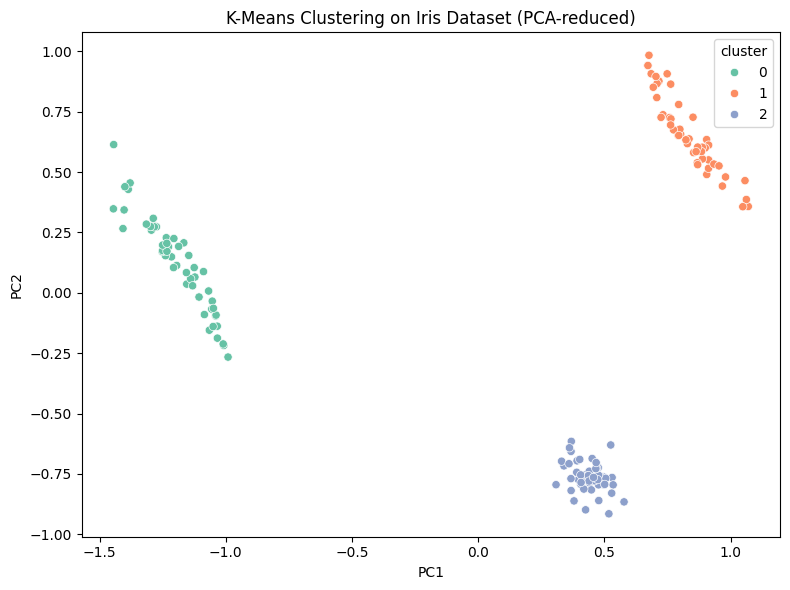

In [27]:

# Remove one-hot encoded labels for clustering
feature_cols = [col for col in df.columns if not col.startswith("target_")]
X = df[feature_cols]

# Apply K-Means clustering with optimal k (3)
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X)
df["PC1"] = components[:, 0]
df["PC2"] = components[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="cluster", palette="Set2")
plt.title("K-Means Clustering on Iris Dataset (PCA-reduced)")
plt.tight_layout()
plt.savefig("datamining/visualizations/iris_clusters.png")

# Save clustered data
df.to_csv("datamining/iris_clustered.csv", index=False)
print("Clustering complete. Results saved to iris_clustered.csv and iris_clusters.png")


Clustering Analysis

The K-Means clustering algorithm was applied to the Iris dataset using three clusters, which aligns with the known species: Setosa, Versicolor, and Virginica. The elbow curve confirmed that k=3 is optimal, as the reduction in WCSS begins to plateau beyond this point. Experiments with k=2 and k=4 showed less distinct separation and increased overlap between clusters, especially for Versicolor and Virginica, which are more similar in feature space.

Cluster quality was generally strong, with Setosa forming a well-separated group. However, some misclassifications occurred between Versicolor and Virginica due to overlapping petal and sepal measurements. This highlights a limitation of K-Means: it assumes spherical clusters and equal variance, which may not hold in real-world data.

In practical applications, clustering like this can support customer segmentation, where businesses group customers by behavior or preferences. For example, retailers could use similar clustering techniques to identify high-value customers, seasonal buyers, or discount-sensitive shoppers. These insights enable targeted marketing, personalized recommendations, and optimized inventory planning.